In [1]:
%pylab inline
import numpy as np

import seaborn as sns
import h5py
import glob2

Populating the interactive namespace from numpy and matplotlib


In [2]:
def listify_data(unique_string, path):
    glob_str = path + '*' + unique_string + '*'
    files = glob2.glob(glob_str)
    #print(glob_str)
    #return files
    
    dataList = []
    for f in files:
        with h5py.File(f,'r') as hf:
            data = hf.get('data')
            dataList.append(np.array(data))
    return dataList
        

In [5]:
def get_surf_data(M,N):

    points = listify_data('surfaceSwarm', '../results/{}/{}/**/'.format(M, N))
    ty = listify_data('surfaceHeat', '../results/{}/{}/**/'.format(M, N))

    
    #points = np.linspace((-1.2*depth*2.5)/2900., (1.2*1000*2.5)/2900., len(vx[0]))
    return points, ty

In [10]:
points, tempGrad = get_surf_data('T','9')

In [18]:
len(points)

61

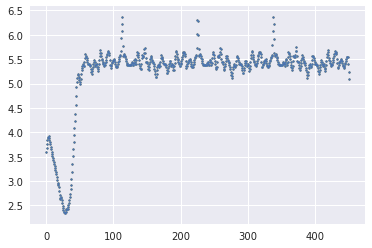

In [20]:
for i in range(0,len(points),5):
    plt.scatter(points[i][:,0]*300.,  -1*tempGrad[i], s= 2 )

(20, 100)

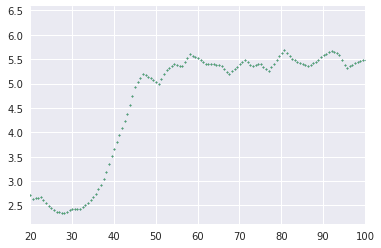

In [24]:
fig, ax = plt.subplots()

ax.scatter(points[0][:,0]*300.,  -1*tempGrad[0], s= 2 )
ax.scatter(points[-1][:,0]*300.,  -1*tempGrad[-1], s= 2 )

ax.set_xlim(20, 100)